In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/prediction-of-surgery-duration/sample_submission_.csv
/kaggle/input/prediction-of-surgery-duration/train.csv
/kaggle/input/prediction-of-surgery-duration/test.csv


In [3]:
train = pd.read_csv('/kaggle/input/prediction-of-surgery-duration/train.csv', encoding = 'ISO-8859-1')
test = pd.read_csv('/kaggle/input/prediction-of-surgery-duration/test.csv', encoding = 'ISO-8859-1')

# **EXPLORATORY DATA ANALYSIS**

**by Rıdvan Berkay Hocaoğlu**

In [4]:
train.head()

,ID,DiagnosticICD10Code,SurgeryGroup,AnesthesiaType,SurgeryName,Age,Sex,Service,DoctorID,AnaesthetistID,ElapsedTime(second)
0,1829,{'L05'},{'C'},Spinal Anestezi,Pilonidal kist,26,MALE,GENEL CERRAH? SERV?S?,5,13,6333
1,1104,{'N20.1'},{'C'},Spinal Anestezi,NaN,24,MALE,ÜROLOJ? SERV?S?,15,3,2972
2,1850,{'K80.8'},{'B'},Genel Anestezi,"Kolelitiazis, di?er",38,MALE,GENEL CERRAH? SERV?S?,36,14,4647
3,1059,"{nan, 'M51.1'}","{0, 'B'}",Genel Anestezi,Lumbar ve di?er intervertebral disk bozuklukla...,41,FEMALE,ORTOPED? SERV?S?,42,6,4871
4,608,"{'M51.1', nan, 'M48.0'}","{0, 'B', 'C', 'D', 'A3'}",Genel Anestezi,Lumbar ve di?er intervertebral disk bozuklukla...,49,FEMALE,ORTOPED? SERV?S?,42,9,9046


In [5]:
train.shape

(2822, 11)

**OBSERVATIONS**
* Dataset has 2822 entries with 11 different features.

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2822 entries, 0 to 2821
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2822 non-null   int64 
 1   DiagnosticICD10Code  2601 non-null   object
 2   SurgeryGroup         2822 non-null   object
 3   AnesthesiaType       2601 non-null   object
 4   SurgeryName          2447 non-null   object
 5   Age                  2822 non-null   int64 
 6   Sex                  2822 non-null   object
 7   Service              2822 non-null   object
 8   DoctorID             2822 non-null   int64 
 9   AnaesthetistID       2822 non-null   int64 
 10  ElapsedTime(second)  2822 non-null   int64 
dtypes: int64(5), object(6)
memory usage: 242.6+ KB


**OBSERVATIONS**
* The data includes missing values in features diagnostics, anesthesia type and surgery name


In [7]:
#describe of numerical data
train[['Age', 'ElapsedTime(second)']].describe()

,Age,ElapsedTime(second)
count,2822.000000,2822.000000
mean,43.897945,4542.537916
std,16.078510,3034.057882
min,0.000000,65.000000
25%,34.000000,2499.500000
50%,45.000000,3732.500000
75%,56.000000,5541.250000
max,102.000000,21550.000000


**OBSERVATIONS**
* We can see that the data includes patients whose ages are ranging from 0 to 102 years.
* The maximum elapsed time of an operation in the dataset is 21550 seconds which is around 360 minutes or 6 hours, with an approximate mean value of 4540 seconds which is around 75 minutes or 1.25 hours.

In [9]:
#number of services
len(train['Service'].unique())

10

In [10]:
len(train['SurgeryName'].unique())

253

**OBSERVATIONS**
* There are 253 different surgeries in dataset and these surgeries are operated by 10 different services.

In [11]:
#imports for plotting
import seaborn as sns
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Distribution of Genders')

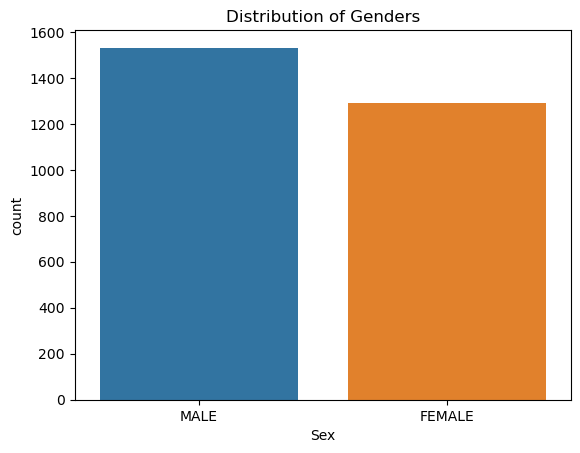

In [12]:
#distribution of genders
fig = sns.countplot(x='Sex', data=train)
fig.set_title("Distribution of Genders")

**OBSERVATIONS**
* We can see that the gender of patients are nearly equal distributed, with a slight excess of male patients.

Text(0.5, 1.0, 'Correlation Between Age and Elapsed Time')

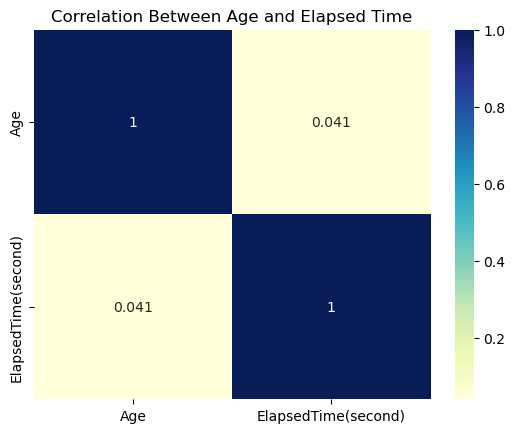

In [27]:
#correlation of numerical data
fig = sns.heatmap(train[['Age', 'ElapsedTime(second)']].corr(), cmap='YlGnBu', annot=True)
fig.set_title("Correlation Between Age and Elapsed Time")

**OBSERVATIONS**
* As we can see in the heatmap above, there is a weak positive linear relationship between ages of the patients and the elapsed time passed in their surgery operations.

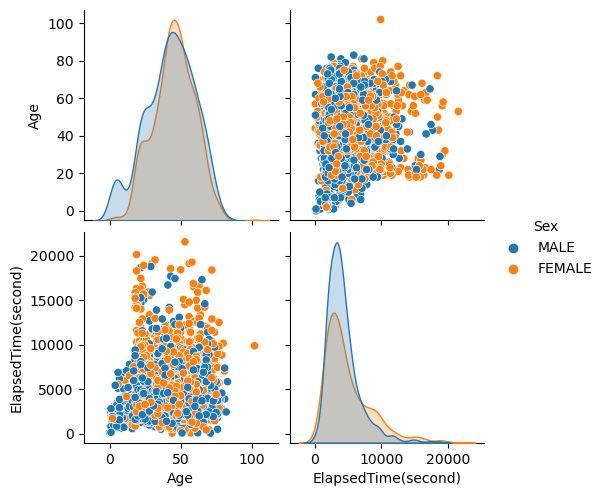

In [16]:
#examine pairwise relationships
pairPltData = train[['Age', 'Sex', 'ElapsedTime(second)']]
fig = sns.pairplot(data=pairPltData, hue='Sex', dropna=True)

**OBSERVATIONS**
* We can see that male patients had mostly short-term operations, whereas female patients had longer-term operations.

Text(0.5, 0, 'Elapsed Time in Minutes')

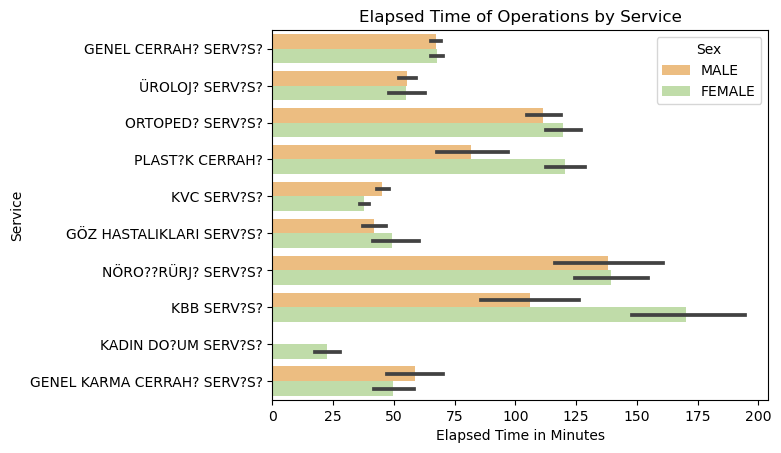

In [17]:
#inspect elapsed time of operations by service
fig = sns.barplot(x=train['ElapsedTime(second)']/60, y='Service', hue='Sex', data=train, palette='Spectral')
fig.set_title("Elapsed Time of Operations by Service")
fig.set_xlabel("Elapsed Time in Minutes")

**OBSERVATIONS**
* From the bar graph above, we can say that there is a time difference between male and female patients in certain services. These services are "KBB SERVISI" and "PLASTIK CERRAHI"
* The absence of male patients in the "KADIN DOGUM SERVISI" shows that this service is for female patients.

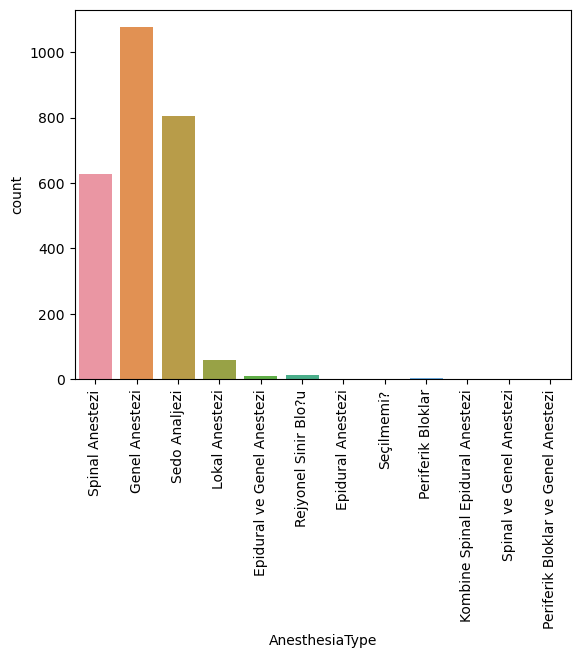

In [31]:
plt.xticks(rotation=90)

fig = sns.countplot(x='AnesthesiaType', data=train)

**OBSERVATIONS**
* With the help of the graph above, we can spot that most surgery operations were operated with 3 anesthesia type "Spinal", "General" and "Sedo Analjezi"

# **LEARNING CURVE**

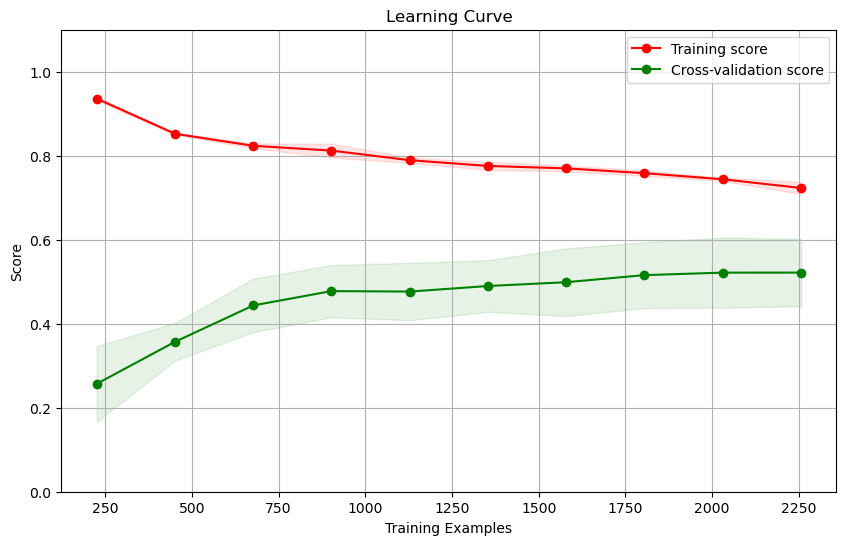

In [127]:
from sklearn.model_selection import learning_curve

train_sizes = np.linspace(0.1, 1.0, 10)

train_sizes, train_scores, test_scores = learning_curve(
    sgd, X, train_y, train_sizes=train_sizes, cv=5)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10,6))
plt.title('Learning Curve')
plt.xlabel('Training Examples')
plt.ylabel('Score')
plt.ylim(0.0, 1.1)
plt.grid()
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color='r')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color='g')
plt.plot(train_sizes, train_scores_mean, 'o-', color='r',
         label='Training score')
plt.plot(train_sizes, test_scores_mean, 'o-', color='g',
         label='Cross-validation score')
plt.legend(loc='best')
plt.show()

**OBSERVATIONS**
* The learning curve in the graph shows that as the number of training examples increases, the performance of the model improves. Initially, the performance of the model improves rapidly as more data is added, but eventually, the rate of improvement slows down as the model approaches its maximum potential performance.
* Ideally, the validation curve should follow a similar trend to the training curve, indicating that the model is not overfitting or underfitting. Overfitting occurs when the model performs well on the training data but poorly on the validation data, while underfitting occurs when the model performs poorly on both the training and validation data.
* In this graph, the validation curve seems to follow the training curve closely, which suggests that the model is performing well and is not overfitting or underfitting.
* It is estimaed that these training and validation curves both plateau at around 0.65, indicating that this is the maximum performance that can be achieved with this particular model and dataset.


  *(This training is performed with stochastic gradient descent regression)*

